# **Proyecto Final**

#### **Equipo de Trabajo: Blas Duarte**

## _Descripción del problema_

*** 

_Según los CDC, las enfermedades cardíacas son una de las principales causas de muerte para las personas de la mayoría de las razas en los EE. UU. (afroamericanos, indios americanos y nativos de Alaska, y blancos). Aproximadamente la mitad de todos los estadounidenses (47 %) tienen al menos 1 de 3 factores de riesgo clave de enfermedad cardíaca: presión arterial alta, colesterol alto y tabaquismo. Otros indicadores clave incluyen el estado diabético, la obesidad (IMC alto), no realizar suficiente actividad física o beber demasiado alcohol. Detectar y prevenir los factores que más inciden en las enfermedades del corazón es muy importante en el ámbito sanitario. Los desarrollos computacionales, a su vez, permiten la aplicación de métodos de aprendizaje automático para detectar "patrones" a partir de los datos que pueden predecir la condición de un paciente._

***

## _Objetivos_

*** 

*   _Indicar qué variables tienen un efecto significativo en la probabilidad de enfermedad cardíaca._

***

### Objetivos Específicos ###

*** 
*   _Entender el problema de negocio e identificar los elementos a ser considerados para el planteamiento de un Modelo de Data Science._
*   _Describir los datos del caso y las relaciones entre datos mediante el Análisis Exploratorio de Datos._
*   _Desarrollar las instancias de Data Acquisition y Data Wrangling_
*   _Construir una presentación ejecutiva para la alta gerencia mostrando los resultados obtenidos._
*   _Aplicar modelos de predicción como regresion logística_
***

## Data Adquisition ##

_Originalmente, el conjunto de datos proviene de los CDC y es una parte importante del Sistema de Vigilancia de Factores de Riesgo del Comportamiento (BRFSS), que realiza encuestas telefónicas anuales para recopilar datos sobre el estado de salud de los residentes de EE. UU. Como describe el CDC: "Establecido en 1984 con 15 estados, BRFSS ahora recopila datos en los 50 estados, así como en el Distrito de Columbia y tres territorios de EE. UU. sistema de encuestas en el mundo". El conjunto de datos más reciente (al 15 de febrero de 2022) incluye datos de 2020. Consta de 401 958 filas y 279 columnas. La gran mayoría de las columnas son preguntas que se hacen a los encuestados sobre su estado de salud, como "¿Tiene serias dificultades para caminar o subir escaleras?" o "¿Has fumado al menos 100 cigarrillos en toda tu vida? [Nota: 5 paquetes = 100 cigarrillos]". En este conjunto de datos, noté muchos factores diferentes (preguntas) que directa o indirectamente influyen en la enfermedad cardíaca, así que decidí seleccionar las variables más relevantes y hacer una limpieza para que pudiera usarse para proyectos de aprendizaje automático. Sin embargo, el conjunto de datos original de casi 300 variables se redujo a solo unas 20 variables para la predicción de existencia de enfermedades cardíacas._

_Fuente: [Kaggle](https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease)_

## _Descripción del dataset_

***

1. **HeartDisease**: Encuestados que alguna vez informaron haber tenido una enfermedad cardíaca coronaria (CHD) o un infarto de miocardio (IM).
2. **IMC**: Índice de Masa Corporal (IMC).
3. **Smoking**: ¿Ha fumado al menos 100 cigarrillos en toda su vida? (La respuesta Sí o No).
4. **AlcoholDrinking**: Bebedores frecuentes (hombres adultos que toman más de 14 tragos p/semana y mujeres adultas que toman más de 7 tragos p/semana)
5. **Stroke**: (Alguna vez le dijeron) (usted tuvo) un accidente cerebrovascular?
6. **PhysicalHealth**: Su salud física, incluye enfermedades y lesiones físicas, ¿cuántos días durante los últimos 30 días su salud física no fue buena?
7. **MentalHealth**: Pensando en su salud mental, ¿durante cuántos días durante los últimos 30 días su salud mental no fue buena? (0-30 días).
8. **DiffWalking**: ¿Tiene serias dificultades para caminar o subir escaleras?
9. **Sex**: ¿Hombre o Mujer?
10. **AgeCategory**: Categoría de edad de catorce niveles.
11. **Race**: Valor de raza/etnicidad imputado.
12. **Diabetic**: (Alguna vez le dijeron) (usted tenía) diabetes?
13. **PhysicalActivity**: Adultos que informaron haber realizado actividad física o ejercicio durante los últimos 30 días además de su trabajo habitual.
14. **GenHealth**: ¿Diría usted que, en general, su salud es...?
15. **SleepTime**: en promedio, ¿cuántas horas duermes en un período de 24 horas?
16. **Asthma**: (Alguna vez le dijeron) (usted tenía) asma?
17. **KidneyDisease**: sin incluir cálculos renales, infección de la vejiga o incontinencia, ¿alguna vez le dijeron que tenía una enfermedad renal?
18. **SkinCancer**: (Alguna vez le dijeron) (usted tenía) cáncer de piel?

***

## Data Wrangling ##

## _Configuración de librerías_

***
Se realiza la instalación de las librerías necesarias para trabajar la importación de datos, análisis estadístico y visualización de algunas relaciones entre los datos. Además, se realiza una configuración general de manejo de mensajes de advertencia y de estilo de gráficos.
***

In [22]:
# Importar librerías
# ==============================================================================
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import matthews_corrcoef
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

from scipy import stats

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

# Configuración Gráficas
# ==============================================================================
sns.set()  

## _Lectura del dataset_

***
_Se encapsula la información en un dataframe importando la información desde un archivo con formato csv._
***

In [23]:
# Lectura de datos
# ==============================================================================
df = pd.read_csv('/Users/BlasDuarte/Documents/Blas/Cursos/Coderhouse/Proyecto/RawData/Personal Key Indicators of Heart Disease.csv')
#df = pd.read_csv('/content/heart_2020_cleaned.csv')
df.head(3)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No


## _Transformación del Dataset_

***
_Investigando encontré estos metodos que me permiten identificar aquellas columnas que son de tipo númerico y de tipo categóricas para hacer una diferenciación en los análisis estadísticos. Se aprecia que la gran mayoría de las columnas son de tipo no númericas 15/19._
***

In [24]:
# Herramientas de manipulación del dataset
# ==============================================================================

print('Columnas No Numéricas: {}\n'.format(df.select_dtypes(include=['object']).columns.to_list()))  # Columnas No Numéricas
print('Columnas Numéricas: {}\n'.format(df.select_dtypes(include=['float64']).columns.to_list()))    # Columnas Numéricas
print('Columnas Booleanas: {}\n'.format(df.select_dtypes(include=['bool']).columns.to_list()))    # Columnas Booleanas


Columnas No Numéricas: ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer']

Columnas Numéricas: ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']

Columnas Booleanas: []



*** 
_Se evalúan los valores únicos de cada variable para identificar potenciales transformaciones de los datos que permitan una mejor visualización_
***

In [25]:
# Identificación de los valores únicos por variable
# ===============================================================================

for i in df.columns:
    print(i,': ',np.sort(df[i].unique()), '\n')

HeartDisease :  ['No' 'Yes'] 

BMI :  [12.02 12.08 12.13 ... 93.97 94.66 94.85] 

Smoking :  ['No' 'Yes'] 

AlcoholDrinking :  ['No' 'Yes'] 

Stroke :  ['No' 'Yes'] 

PhysicalHealth :  [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30.] 

MentalHealth :  [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30.] 

DiffWalking :  ['No' 'Yes'] 

Sex :  ['Female' 'Male'] 

AgeCategory :  ['18-24' '25-29' '30-34' '35-39' '40-44' '45-49' '50-54' '55-59' '60-64'
 '65-69' '70-74' '75-79' '80 or older'] 

Race :  ['American Indian/Alaskan Native' 'Asian' 'Black' 'Hispanic' 'Other'
 'White'] 

Diabetic :  ['No' 'No, borderline diabetes' 'Yes' 'Yes (during pregnancy)'] 

PhysicalActivity :  ['No' 'Yes'] 

GenHealth :  ['Excellent' 'Fair' 'Good' 'Poor' 'Very good'] 

SleepTime :  [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19.

## _Transformación de columnas_ ##

***
_Se realizan las siguientes transformaciones de datos para tener una mejor interpretación de los resultados. Los cambios se enfocan principalmente en tener un orden en las columnas o la reducción del largo de los nombres de las columnas._
***

In [26]:
# Reemplazar valores para ajustar categorías en la visualización
# ================================================================================
df['Diabetic'].replace(['No, borderline diabetes', 'Yes (during pregnancy)'], ['No', 'Yes'], inplace = True)
df['Race'].replace(['American Indian/Alaskan Native'], ['American'], inplace = True)
df['GenHealth'].replace(['Excellent', 'Fair', 'Good', 'Poor', 'Very good'], ['5.Excellent', '2.Fair', '3.Good', '1.Poor', '4.Very good'], inplace = True)
df['Sex'].replace(['Male', 'Female'], ['Yes', 'No'], inplace = True)

***
_Además, se agrega una columna con valores '1' para tener un registro auxiliar en el conteo de algunas tablas pivote utilizadas para análisis particulares._
***

In [27]:
# Agregar columna con 1's para conteo de registros
# ================================================================================
df['N'] = 1
df.head(3)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,N
0,No,16.60,Yes,No,No,3.0,30.0,No,No,55-59,White,Yes,Yes,4.Very good,5.0,Yes,No,Yes,1
1,No,20.34,No,No,Yes,0.0,0.0,No,No,80 or older,White,No,Yes,4.Very good,7.0,No,No,No,1
2,No,26.58,Yes,No,No,20.0,30.0,No,Yes,65-69,White,Yes,Yes,2.Fair,8.0,Yes,No,No,1


## _Descripción del dataset_


### _a. Tipo de datos, dimensiones y nulos_

***
Para conocer un poco más del dataset se realiza una inspección del mismo, obteniendo la información del tipo de datos en cada columna, las dimensiones (se leen en la tabla) y la cantidad de datos nulos registrados. Se aprecia que no existen valores nulos en el dataset, y como se revisó anteriormente solo algunas columnas son series númericas.
***

In [28]:
# Conociedo el dataset
# ==============================================================================
df.info()                            # Descripción del tipo de datos de columnas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

### _b. Estadísticas Básicos Univariadas_

#### b.1. Variables Númericas

***
Se realiza una análisis estadístico de las variables númericas. Es importante notar que algunas de estas podrían tener características discretas, pero por simplicidad se consideran como continuas para efectos de este ejercicio. En esta mirada se puede apreciar:

1. La variable BMI, que contempla la relación de peso y estatura, presenta una baja dispersión dentro de sus valores, coeficiente de variación de un 23%, pero con algunos niveles extremos muy marcados.
2. La variable PhysicalHealth, que contempla los días que el individuo se sintió mal fisicamente, presenta una gran cantidad de datos con valor 0 (que no se asumen como datos faltantes) y con una alta dispersión dado el coeficiente de variación de 42%.
3. La variable MentalHealth, que contempla lo mismo que lo anterior pero en un ámbito sicológico, se aprecia un comportamiento similar en nivel de evaluaciones 0 y de dispersión.
4. La variable SleepTime, que contempla la cantidad de horas dormidas diarias se aprecia que hay poca dispersión y algunos valores atípicos a revisar (ej. 24 horas al día de dormir)
***

In [29]:
# Descripción del dataset: Estadísticos descriptivos variables númericas
# ==============================================================================

df.describe().T

,count,mean,std,min,25%,50%,75%,max
BMI,319795.0,28.325399,6.356100,12.02,24.03,27.34,31.42,94.85
PhysicalHealth,319795.0,3.371710,7.950850,0.00,0.00,0.00,2.00,30.00
MentalHealth,319795.0,3.898366,7.955235,0.00,0.00,0.00,3.00,30.00
SleepTime,319795.0,7.097075,1.436007,1.00,6.00,7.00,8.00,24.00
N,319795.0,1.000000,0.000000,1.00,1.00,1.00,1.00,1.00


#### b.2. Variables No Númericas

*** 
Para las variables no númericas se realiza una revisión de la participación de cada categoría en las variables. Del análisis se pueden apreciar algunos aspectos interesantes, tales como:

1. En general la mayoría de las variables son de dos categorías (Yes/No, Male/Female)
2. Tienden a ser muestras desbalanceadas, a excepción de la variables Smoking y Sex que son más equilibradas.

***

In [1]:
# Descripción del dataset: Estadísticos descriptivos variables no númericas
# ==============================================================================

for i in range(len(df.select_dtypes(include=['object']).columns.to_list())):
    print(df[df.select_dtypes(include=['object']).columns.to_list()[i]].value_counts(normalize = True, ascending = True).sort_index(), '\n')
    

NameError: name 'df' is not defined

#### _b.3. Visualización de datos_

*** 
Se realiza una visualización de la información para las variables númericas y categóricas por separado.
***

#### b.3.1. Variables Númericas

##### b.3.1.1 Variables Númericas - BoxPlot

***
Se trabaja una secuencia iterativa para poder graficar todas las variables númericas con un boxplot, ya que esta gráfica permite tener una mirada más clara de la dispersión de los datos. Se aprovecha de realizar la evaluación según la variable objetivo 'HeartDisease' para determinar si existe alguna variable que tenga un perfil discriminante más marcado que el resto.

En las gráficas presentadas, se aprecia lo siguiente:

1. La variable BMI, presenta una distribución con concentración de valores cercano a 30 (tal como se veía en los estadísticos anteriores). Además, se ve una gran cantidad de casos atípicos para BMI sobre 40 puntos.
2. La variable PhysicalHealth y MentalHealth se aprecia una baja dispersión de los resultados concentrados en un nivel 0. Llama la atención la cantidad de casos que contemplan 30 días de mala salud fisica.
3. La variable SleepTime contempla una concentración de valores en un rango esperado entre 6 a 8 horas.
***

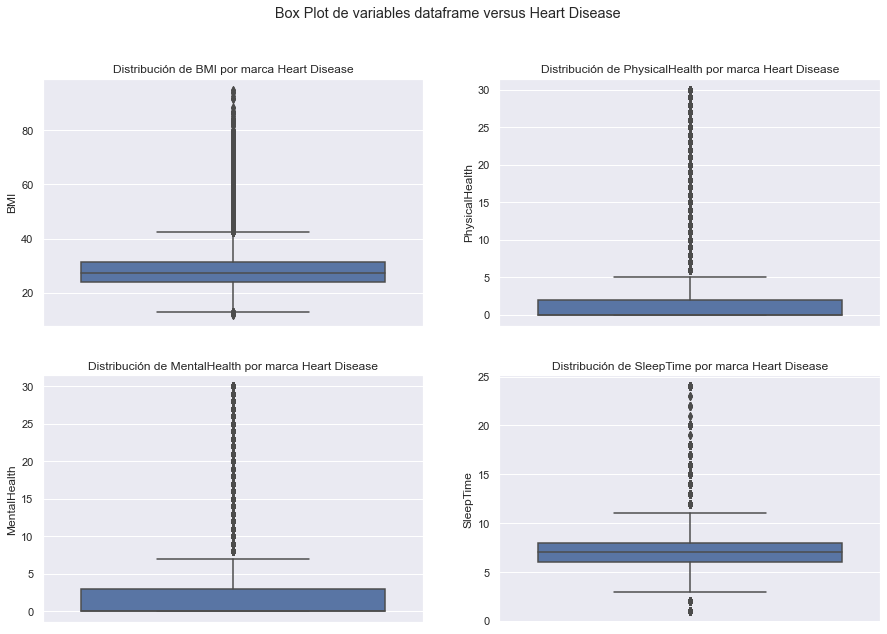

In [31]:
fig, ax = plt.subplots(2, 2, figsize=(15,10))
fig.suptitle('Box Plot de variables dataframe versus ''Heart Disease''')

dict = {i: df.select_dtypes(include=['float64']).columns.to_list()[i] for i in range(4)} #Creación de diccionario para homologar llamado del ciclo iterativo
k = 0

for i in range(2):
    for j in range(2):
        ax[i][j].set_title(f'Distribución de {dict[k]} por marca Heart Disease')
        sns.boxplot(ax=ax[i][j], data = df, y = dict[k])
        k += 1

### Evaluación de Outliers ###

***
_Se realiza una evaluación de la cantida de elementos outliers que existen en las variables según el criterio intercuartil para así determinar si son factibles de borrar o trabajarlo de otra manera._
***

In [32]:
# Conteo de outliers
############################################################################

def cuenta_outliers(data):
  q1 = data.quantile(q = .25)
  q3 = data.quantile(q = .75)
  return data[(data < q1 - 1.5*(q3-q1)) | (data > q3 + 1.5*(q3-q1))].shape[0]

for i in range(len(df.select_dtypes(include=['float64']).columns.to_list())):
  print("% outliers en ",
      df.select_dtypes(include=['float64']).columns.to_list()[i], 
      ": ", round(cuenta_outliers(df[df.select_dtypes(include=['float64']).columns.to_list()[i]]) / df[df.select_dtypes(include=['float64']).columns.to_list()[i]].shape[0]* 100, 2)
      )


% outliers en  BMI :  3.25
% outliers en  PhysicalHealth :  14.74
% outliers en  MentalHealth :  16.13
% outliers en  SleepTime :  1.42


***
_Se contempla trabajar las variables Physical Health y Mental Health como variables dicotómicas para no perder registros._
***

##### b.3.1.2 Variables Númericas - Histograma

***
Se realiza también un análisis más detallado de las variables númericas para entender la forma de su distribución. En general se aprecian las mismas conclusiones que antes, pero se pueden identificar algunas cosas interesantes:

1. La variable BMI, presenta una distribución con concentración de valores cercano a 30 (tal como se veía en los estadísticos anteriores). Además, se ve una gran cantidad de casos atípicos para BMI sobre 40 puntos.
2. La variable PhysicalHealth y MentalHealth se aprecia una baja dispersión de los resultados concentrados en un nivel 0. Llama la atención la cantidad de casos que contemplan 30 días de mala salud fisica.
3. La variable SleepTime contempla una concentración de valores en un rango esperado entre 6 a 8 horas.
***

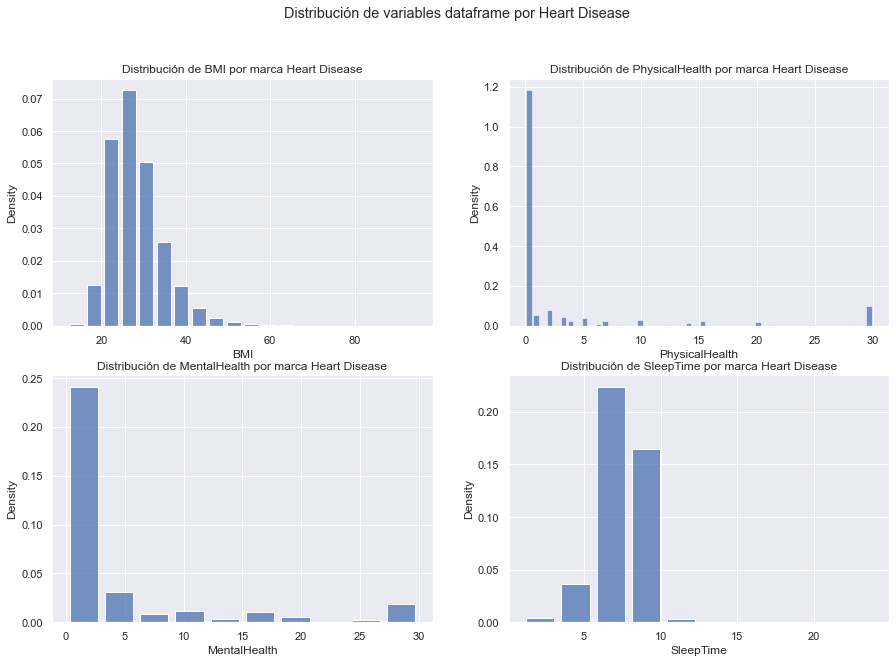

In [33]:
# Visualización de los datos númericos
# ==============================================================================
fig, ax = plt.subplots(2,2, figsize=(15,10))
fig.suptitle('Distribución de variables dataframe por ''Heart Disease''')

dict = {i: df.select_dtypes(include=['float64']).columns.to_list()[i] for i in range(4)} #Creación de diccionario para homologar llamado del ciclo iterativo
bins = {0: 20 , 1: 50 , 2: 10, 3: 10}

k = 0

for i in range(2):
    for j in range(2):

        ax[i][j].set_title(f'Distribución de {dict[k]} por marca Heart Disease')
        sns.histplot(ax = ax[i][j], data = df, x=dict[k], bins = bins[k], stat="density", common_norm=False, shrink = 0.8, palette='YlOrBr')
        k += 1


#### b.3.2. Variables No Númericas

***
Se realiza también un análisis más detallado de las variables no númericas para entender la forma de su distribución. En general se aprecian las mismas conclusiones que antes, pero se pueden identificar algunas cosas interesantes:

1. La variable HeartDisease es una variable desbalanceada, ya que tiene una alta participación de casos 'No' (cerca del 90%)
2. En general la mayor parte de las variables tiene una concentración en valores 'No' que se traducen en un buen comportamiento por parte del paciente (no fuma, no bebe, no ha sentido problemas físicos y/o mentales, etc.)
3. La variable Smoke es la que presenta un comportamiento diferente puesto que tiene un balanceo distinto a las otras variables.

***

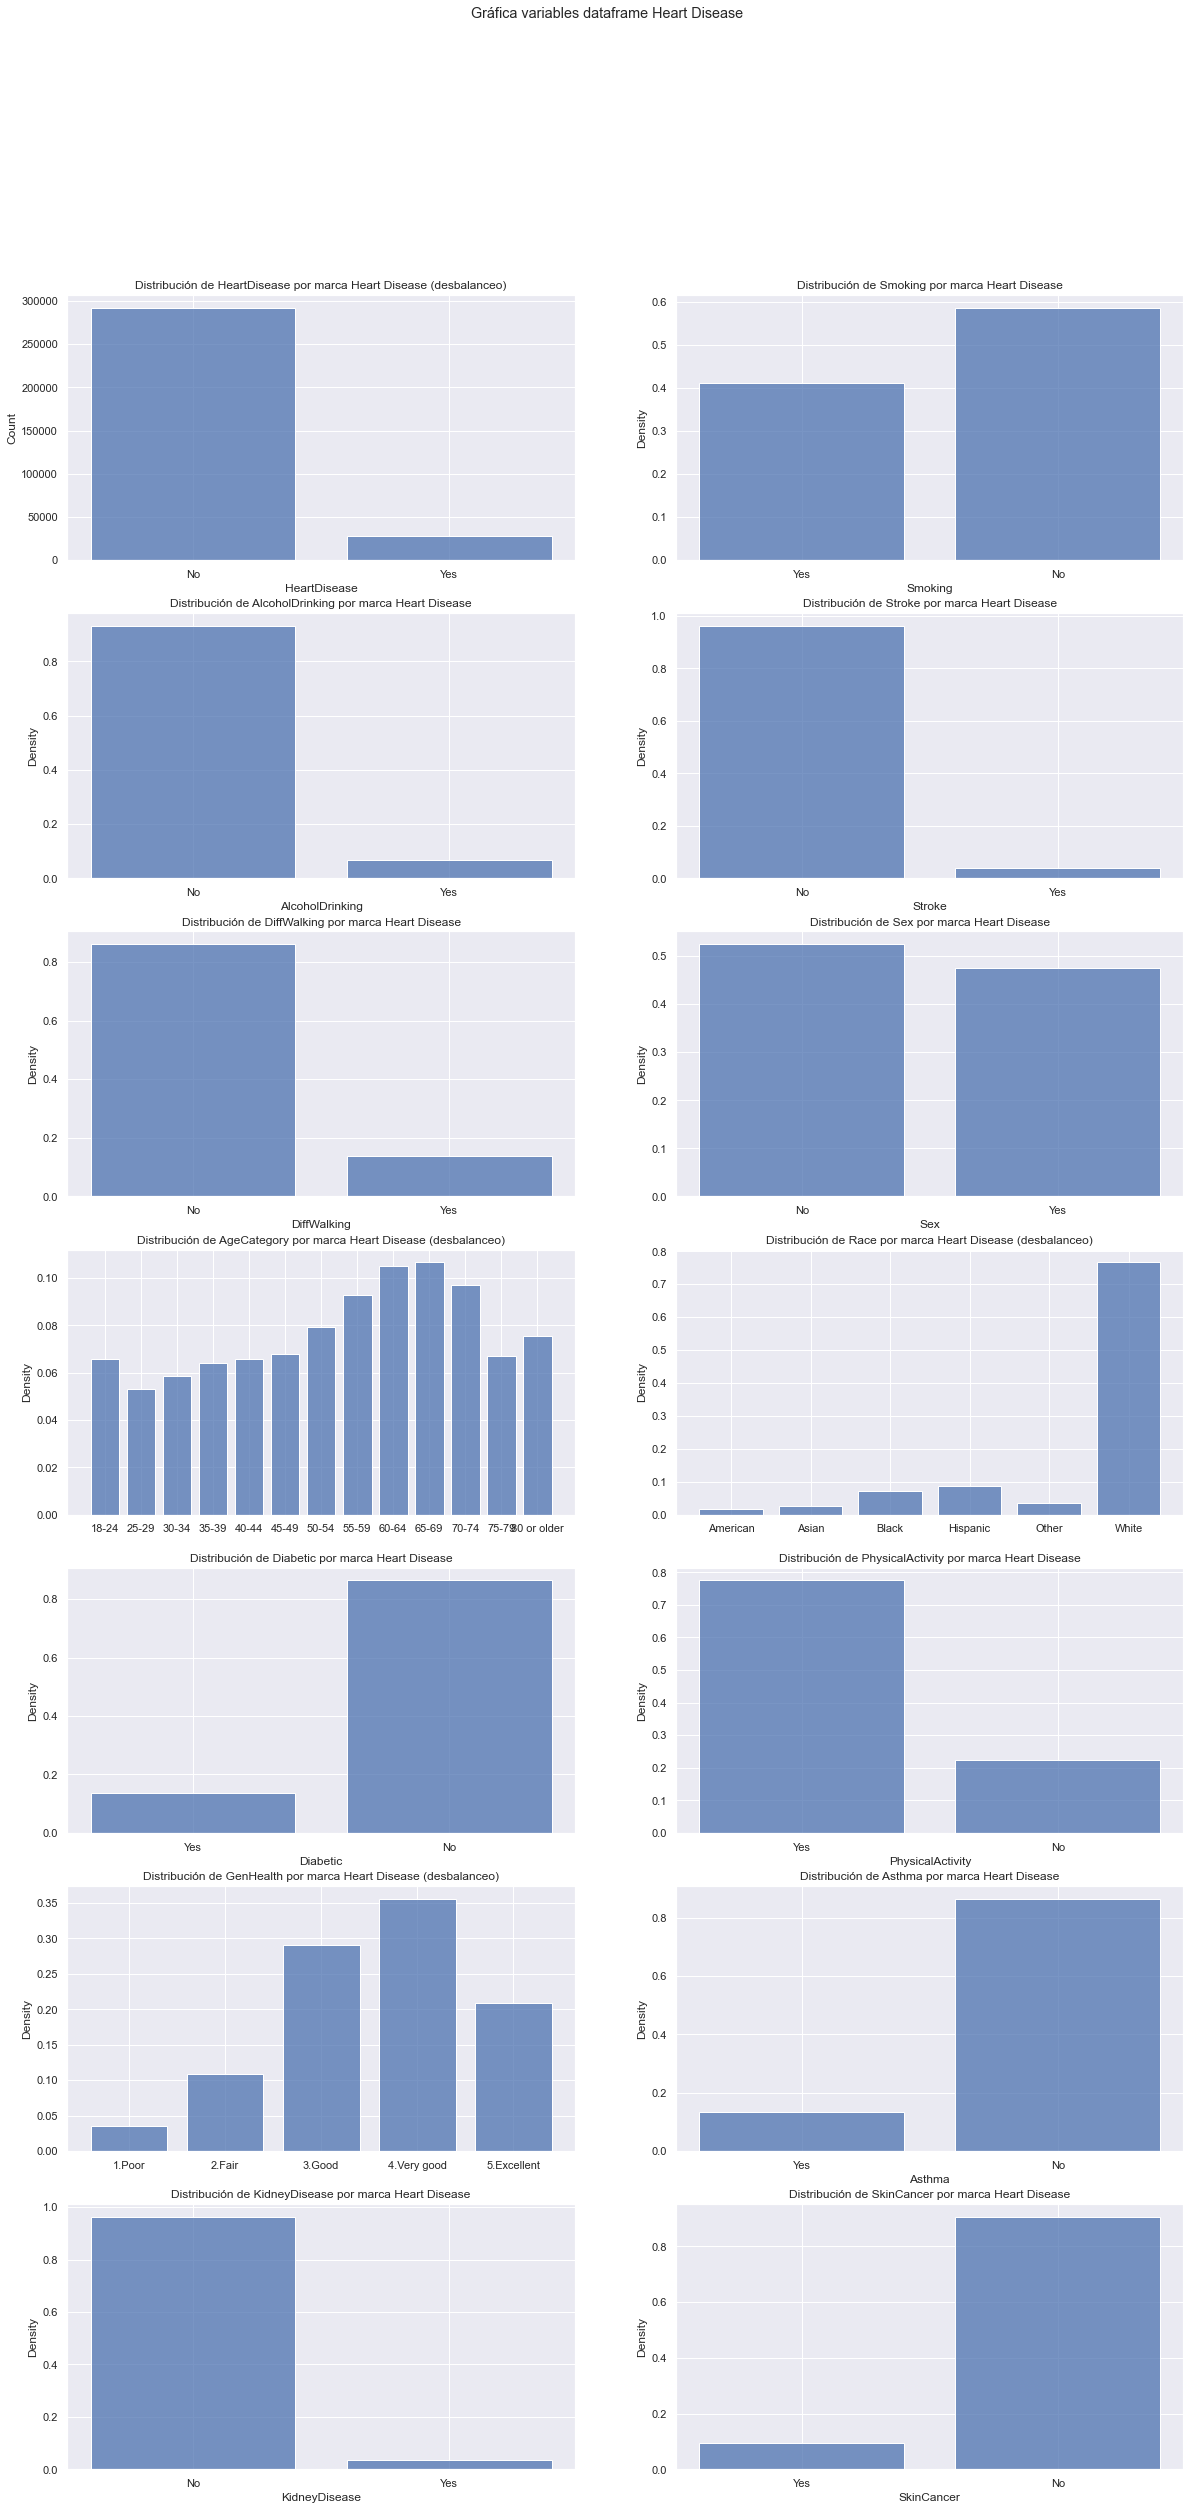

In [34]:
# Visualización de los datos categoricos
# ==============================================================================
fig, ax = plt.subplots(7, 2, figsize = (20,40))
fig.suptitle('Gráfica variables dataframe ''Heart Disease''')

dict = {i: df.select_dtypes(include=['object']).columns.to_list()[i] for i in range(14)}
k = 0

for i in range(7):
    for j in range(2):
        if k >= 14: #Uso esta condición dado que no uso toda la grilla de gráficos.
            pass
        elif dict[k] == 'HeartDisease':
            ax[i][j].set_title(f'Distribución de {dict[k]} por marca Heart Disease (desbalanceo)')
            sns.histplot(ax=ax[i][j], data = df, x = df[dict[k]], common_norm=False, shrink = 0.8, palette='YlOrBr')
        elif dict[k] in ['AgeCategory', 'Race', 'GenHealth']:
            ax[i][j].set_title(f'Distribución de {dict[k]} por marca Heart Disease (desbalanceo)')
            sns.histplot(ax=ax[i][j], data = df, x = np.sort(df[dict[k]]), stat = 'density', common_norm=False, shrink = 0.8, palette='YlOrBr')
        else:
            ax[i][j].set_title(f'Distribución de {dict[k]} por marca Heart Disease')
            sns.histplot(ax=ax[i][j], data = df, x = df[dict[k]], stat = 'density', common_norm=False, shrink = 0.8, multiple = 'dodge', palette='YlOrBr')
        k += 1


### _c. Estadísticas Básicos Bivariadas contra variable objetivo HeartDisease_

##### c.1.1 Variables Númericas/Ordinales - BoxPlot

***
Se trabaja una secuencia iterativa para poder graficar todas las variables númericas con un boxplot, ya que esta gráfica permite tener una mirada más clara de la dispersión de los datos. Se aprovecha de realizar la evaluación según la variable objetivo 'HeartDisease' para determinar si existe alguna variable que tenga un perfil discriminante más marcado que el resto.

En las gráficas presentadas, se aprecia lo siguiente:

1. La variable BMI, presenta distribuciones similares para ambas categorías en la variable objetivo. Se aprecia un nivel promedio cercano a 30, con una gran cantidad de casos atípicos.
2. La variable PhysicalHealth, presenta distribuciones diferentes en ambas categorías de la variable HeartDisease. En el caso de la categoría 'No' se aprecia una baja dispersión de los resultados (concentrados en un nivel 0) en los casos que no tienen días de mala salud física. Llama la atención el alto número de valores atípicos que puede ser dado por casos que aún no han tenido efectos o enfermedades cardíacas. Por otro lado, en el caso de la categoría 'Yes' se aprecia mayor dispersión con una alta concentraciónd de casos 0 (mediana). 
3. La variable MentalHealth, presenta distribuciones similiares para ambas categorías de la variable objetivo con una gran cantidad de casos atípicos.
4. La variable SleepTime, presenta distribuciones muy similares para ambas cateogrías.
***

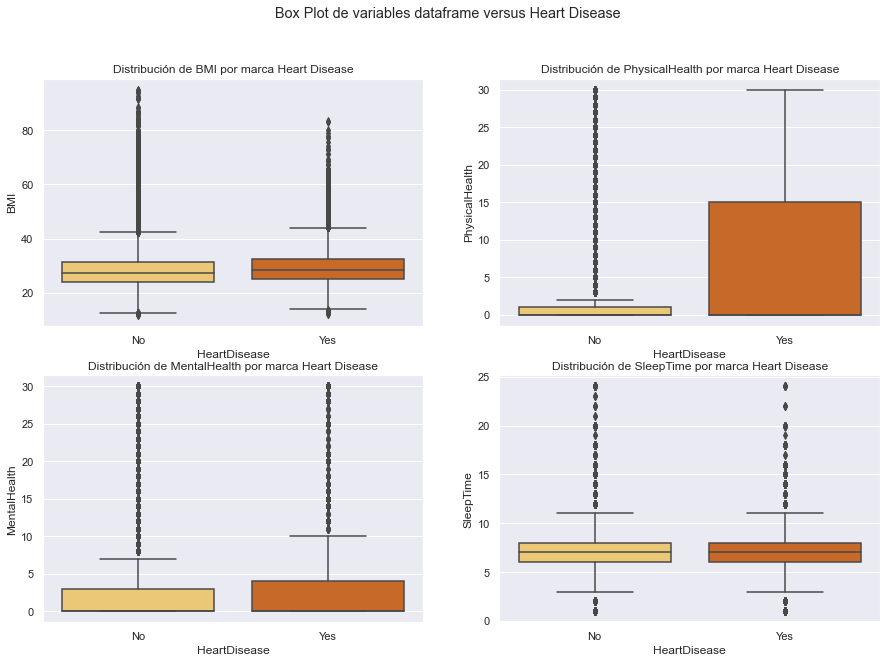

In [35]:
# Visualización de datos númericos BoxPlot
# ==============================================================================

fig, ax = plt.subplots(2, 2, figsize=(15,10))
fig.suptitle('Box Plot de variables dataframe versus ''Heart Disease''')

dict = {i: df.select_dtypes(include=['float64']).columns.to_list()[i] for i in range(4)} #Creación de diccionario para homologar llamado del ciclo iterativo
k = 0

for i in range(2):
    for j in range(2):
        ax[i][j].set_title(f'Distribución de {dict[k]} por marca Heart Disease')
        sns.boxplot(ax=ax[i][j], data = df, x = 'HeartDisease', y = dict[k], palette='YlOrBr')
        k += 1

##### c.1.2 Variables Númericas - Histograma

***
Se realiza también un análisis más detallado de las variables númericas para entender la forma de su distribución. En general se aprecian las mismas conclusiones que antes, pero se pueden identificar algunas cosas interesantes:

1. En la variable BMI, hay una concentración a niveles más altos para la categoría 'Yes' de HeartDisease.
2. En las variables PhysicalHealth y MentalHealth, existe una alta concentración de valores en 0 (desbalanceo de datos).
3. La variable SleepTime presenta distribuciones más concentradas en la categoría 'Yes' de la variable HeartDisease
***

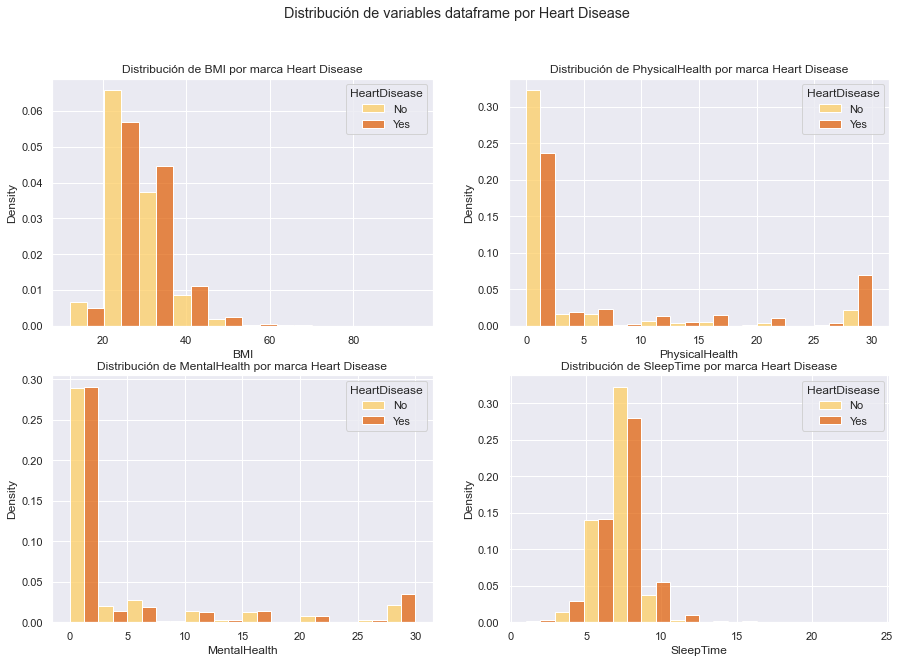

In [36]:
# Visualización de los datos númericos
# ==============================================================================
fig, ax = plt.subplots(2,2, figsize=(15,10))
fig.suptitle('Distribución de variables dataframe por ''Heart Disease''')

dict = {i: df.select_dtypes(include=['float64']).columns.to_list()[i] for i in range(4)} #Creación de diccionario para homologar llamado del ciclo iterativo
bins = {0: 10 , 1: 12 , 2: 12, 3: 12}

k = 0

for i in range(2):
    for j in range(2):

        ax[i][j].set_title(f'Distribución de {dict[k]} por marca Heart Disease')
        sns.histplot(ax = ax[i][j], data = df, x=dict[k], hue="HeartDisease", bins = bins[k], stat="density", common_norm=False, multiple = 'dodge', palette='YlOrBr')
        k += 1

#### c.2. Variables No Númericas

***
Se realiza también un análisis más detallado de las variables no númericas para entender la forma de su distribución. En general se aprecian las mismas conclusiones que antes, pero se pueden identificar algunas cosas interesantes:

1. La variable HeartDisease es una variable desbalanceada, ya que tiene una alta participación de casos 'No' (cerca del 90%)
2. En general en las variables Smoking, Diabetics y AgeCategory se pueden apreciar algunos comportamientos interesantes de cara a desarrollar un modelo de predicción de HeartDisease

***

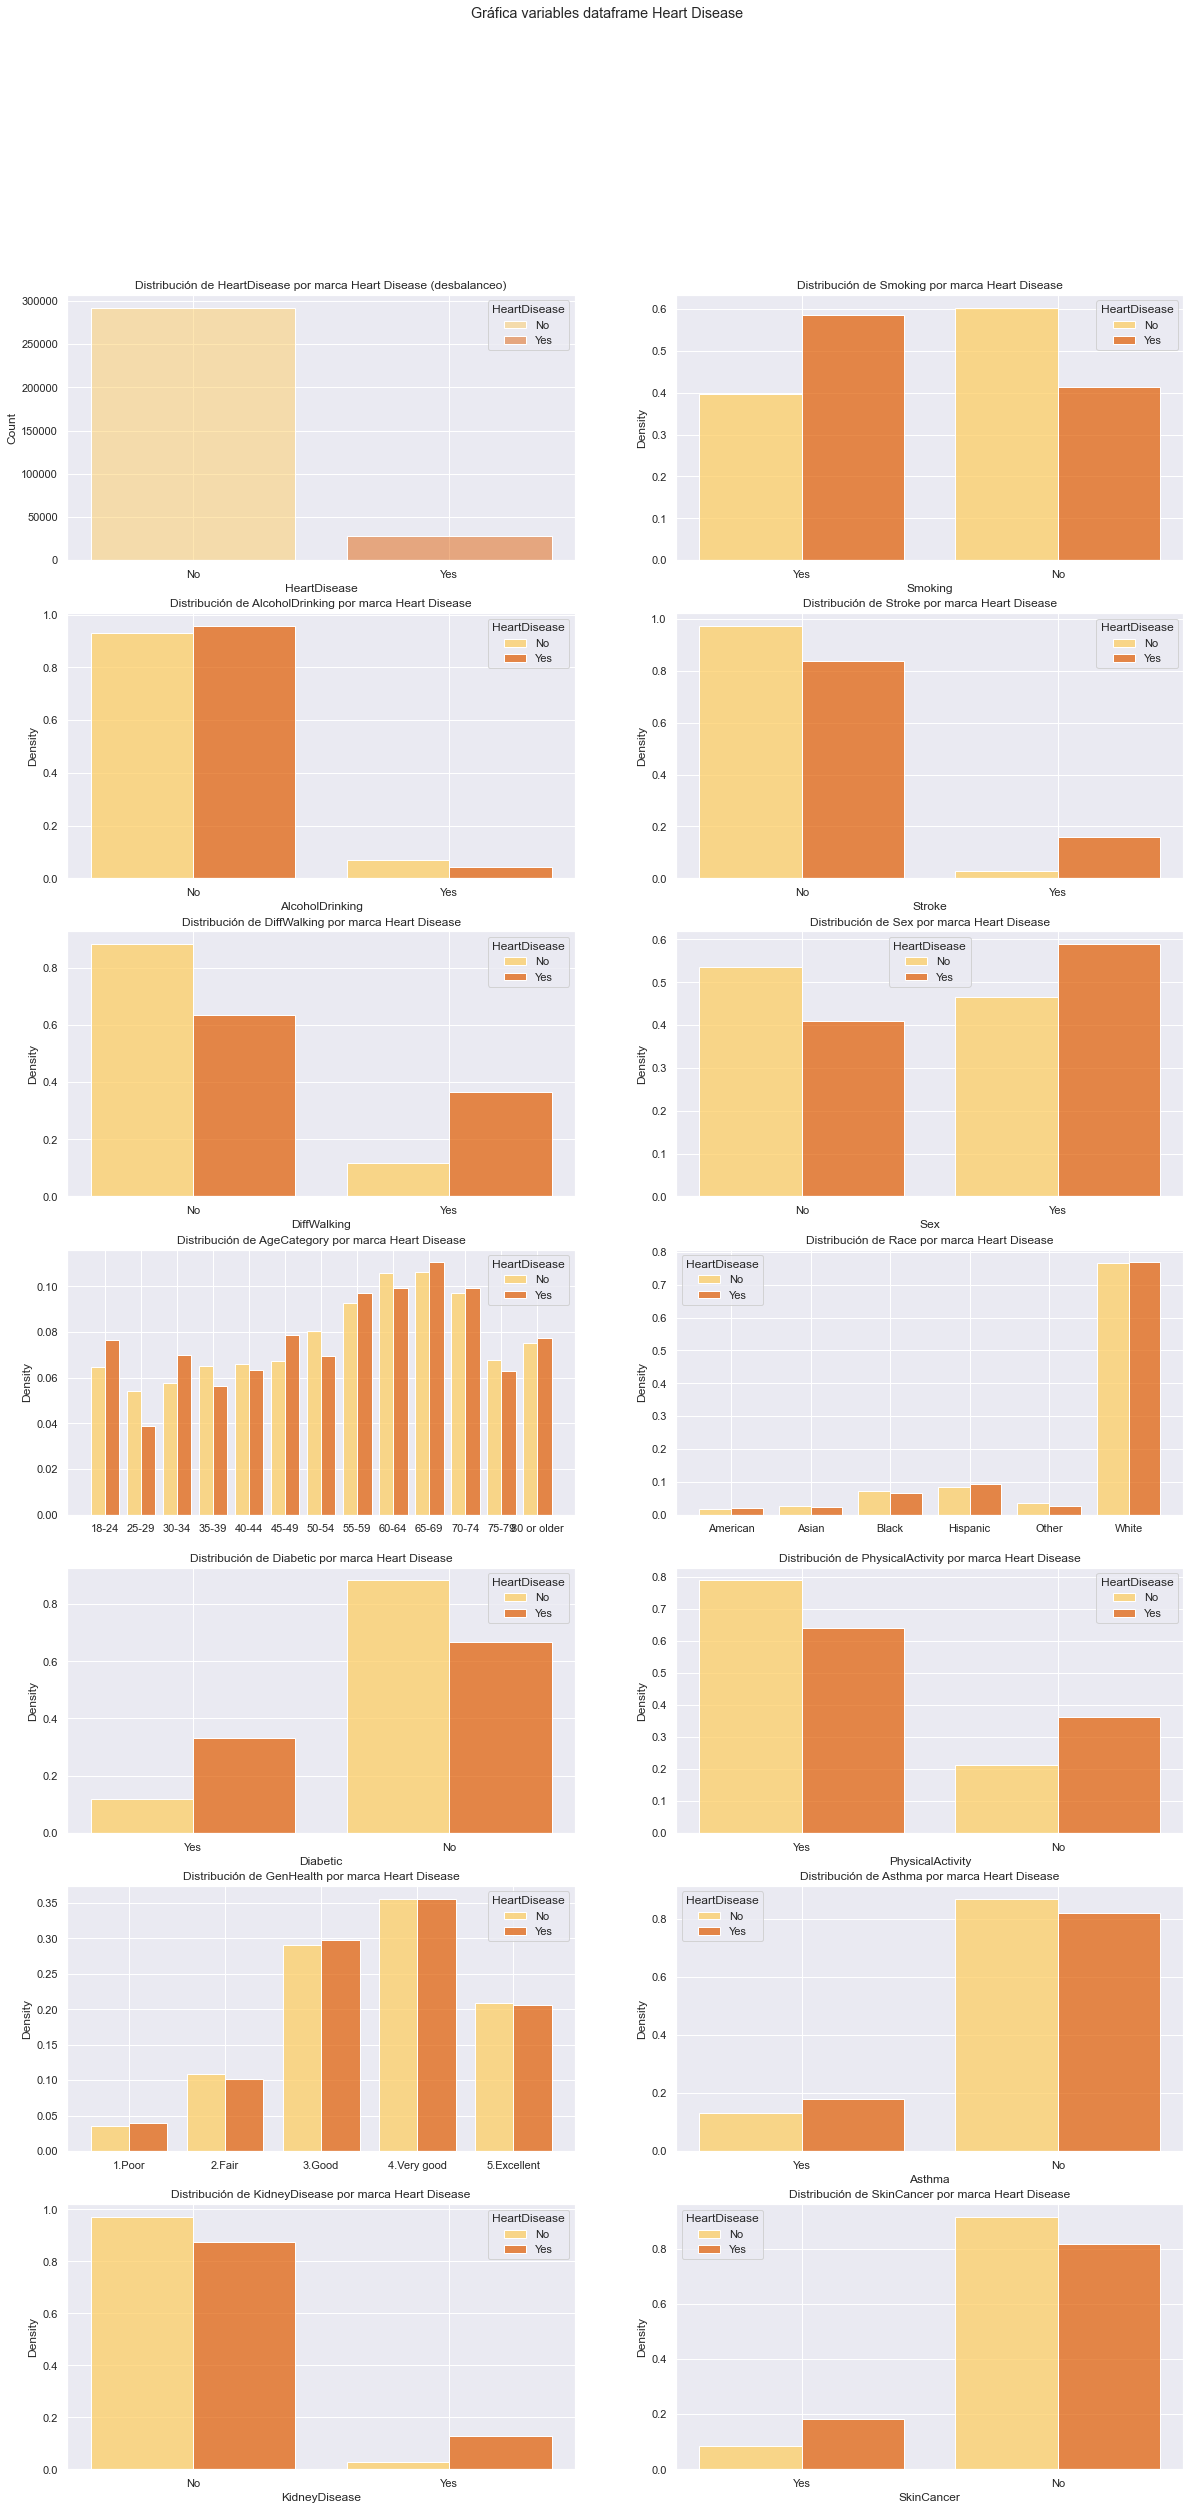

In [37]:
# Visualización de los datos categoricos
# ==============================================================================
fig, ax = plt.subplots(7, 2, figsize=(20,40))
fig.suptitle('Gráfica variables dataframe ''Heart Disease''')

dict = {i: df.select_dtypes(include=['object']).columns.to_list()[i] for i in range(14)}
k = 0

for i in range(7):
    for j in range(2):
        if k >= 14: #Uso esta condición dado que no uso toda la grilla de gráficos.
            pass
        elif dict[k] == 'HeartDisease':
            ax[i][j].set_title(f'Distribución de {dict[k]} por marca Heart Disease (desbalanceo)')
            sns.histplot(ax=ax[i][j], data = df, x = df[dict[k]], hue = 'HeartDisease', common_norm=False, shrink = 0.8, palette='YlOrBr')
        elif dict[k] in ['AgeCategory', 'Race', 'GenHealth']:
            ax[i][j].set_title(f'Distribución de {dict[k]} por marca Heart Disease')
            sns.histplot(ax=ax[i][j], data = df, x = np.sort(df[dict[k]]), hue = 'HeartDisease', stat = 'density', common_norm=False, shrink = 0.8, multiple = 'dodge', palette='YlOrBr')
        else:
            ax[i][j].set_title(f'Distribución de {dict[k]} por marca Heart Disease')
            sns.histplot(ax=ax[i][j], data = df, x = df[dict[k]], hue = 'HeartDisease', stat = 'density', common_norm=False, shrink = 0.8, multiple = 'dodge', palette='YlOrBr')
        k += 1

        

### d. Estadísticas Básicos Bivariadas entre variables

##### d.1 Creación de Características

***
Se generan nuevas variables para determinar si tienen algun valor en las correlaciones con la variable objetivo.

***

In [38]:
# Definición de nuevas variables
# ==============================================================================

df['PhysicalHealth_YN'] = df['PhysicalHealth'].apply(lambda i : 'Yes' if i > 0 else 'No') # Yes: Presenta horas de mala salud física; No: No presenta.
df['MentalHealth_YN'] = df['MentalHealth'].apply(lambda i : 'Yes' if i > 0 else 'No') # Yes: Presenta horas de mala salud mental; No: No presenta.
df['SleepTime_YN'] = df['SleepTime'].apply(lambda i : 'Yes' if (i >= 6 and i <= 8) else 'No') # Yes: Duerme entre 6 y 8 horas; No: Duerme menos de 6 horas o más de 8 horas
df['BMI_Rg'] = pd.cut(df['BMI'],  bins = [0, 19, 24, 29, 34, 100], labels = ['Underweight', 'Normal', 'Overweight', 'Obese', 'Extremly Obese']) # Creación de categorías

In [39]:
df['BMI_Rg']

0            Underweight
1                 Normal
2             Overweight
3             Overweight
4                 Normal
               ...      
319790        Overweight
319791             Obese
319792        Overweight
319793             Obese
319794    Extremly Obese
Name: BMI_Rg, Length: 319795, dtype: category
Categories (5, object): ['Underweight' < 'Normal' < 'Overweight' < 'Obese' < 'Extremly Obese']

##### d.1 Correlaciones

***
En el dataset trabajado se aprecian que existen muchas variables de tipo binaria (Yes/No, Male/Female), algunas categoricas y continuas. En una primera instancia evaluaremos las diferentes correlaciones existentes dependiendo el tipo de comparación que se requiere.

***

In [40]:
# Definición de naturaleza de las variables
# ==============================================================================
Binarias = ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'Diabetic', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer',  'PhysicalHealth_YN', 'MentalHealth_YN', 'SleepTime_YN']
Continua = ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']
Categorica = ['AgeCategory', 'Race', 'GenHealth', 'BMI_Rg']

In [41]:
# Definición de una matriz de correlaciones
# ==============================================================================
mat_corr = pd.DataFrame(columns = ['Variable 1', 'Variable 2', 'Tipo', 'Correlacion'])

##### d.1.1 Correlaciones Binarias contra Binarias (Coeficiente de Matthews) 

In [42]:
# Definición de coeficiente de correlación entre variables binarias
# ==============================================================================

for i in range(len(Binarias)):
    for j in range(len(Binarias)):
        if i < j:
            phi_aux = matthews_corrcoef(df[Binarias[i]], df[Binarias[j]], sample_weight=None)
            auxiliar = pd.DataFrame.from_dict({'Variable 1': [Binarias[i]], 'Variable 2': [Binarias [j]], 'Tipo': 'Matthews', 'Correlacion': [phi_aux]})
            mat_corr = pd.concat([mat_corr, auxiliar], ignore_index = True)
        else:
            pass

##### d.1.2 Correlaciones Binarias contra Continuas (Coeficiente de punto biserial) 

In [43]:
# Definición de coeficiente de correlación entre variables binarias y continuas
# ==============================================================================

for i in range(len(Binarias)):
    for j in range(len(Continua)):
        if i <= j:
          a = stats.pointbiserialr(df[Binarias[i]].replace(['Yes', 'No'], [True, False]), df[Continua[j]])
          auxiliar = pd.DataFrame.from_dict({'Variable 1': [Binarias[i]], 'Variable 2': [Continua[j]], 'Tipo': 'Biseral', 'Correlacion': [a[0]]})
          mat_corr = pd.concat([mat_corr, auxiliar], ignore_index = True)
        else:
          pass

##### d.1.3.1 Correlaciones Continuas contra Continuas (Coeficiente de punto biserial) 

In [44]:
# Definición de coeficiente de correlación entre variables continuas
# ==============================================================================

for i in range(len(Continua)):
    for j in range(len(Continua)):
        if i < j:
          a = df[Continua[i]].corr(df[Continua[j]])
          auxiliar = pd.DataFrame.from_dict({'Variable 1': [Continua[i]], 'Variable 2': [Continua[j]], 'Tipo': 'Pearson', 'Correlacion': [a]})
          mat_corr = pd.concat([mat_corr, auxiliar], ignore_index = True)
        else: 
          pass

##### d.1.3.2 Correlaciones Continuas contra Continuas (Coeficiente de spearman)

In [45]:
# Definición de coeficiente de correlación entre variables continuas
# ==============================================================================

for i in range(len(Continua)):
    for j in range(len(Continua)):
        if i < j:
          a = stats.spearmanr(df[Continua[i]], df[Continua[j]])
          auxiliar = pd.DataFrame.from_dict({'Variable 1': [Continua[i]], 'Variable 2': [Continua[j]], 'Tipo': 'Spearman', 'Correlacion': [a[0]]})
          mat_corr = pd.concat([mat_corr, auxiliar], ignore_index = True)
        else: 
          pass

##### d.1.4.1 Correlaciones Categoricas vs Categoricas (Coeficiente V de Cramer) 

In [46]:
# Definición de coeficiente de correlación entre variables categoricas
# ==============================================================================

for i in range(len(Categorica)):
    for j in range(len(Categorica)):
      if i < j:
        data = pd.pivot_table(df, values='N', index=Categorica[i],  columns=Categorica[j], aggfunc=np.sum).to_numpy()
        X2 = stats.chi2_contingency(data, correction=False)[0]
        n = np.sum(data)
        minDim = min(data.shape)-1
        V = np.sqrt((X2/n) / minDim)
        auxiliar = pd.DataFrame.from_dict({'Variable 1': [Categorica[i]], 'Variable 2': [Categorica[j]], 'Tipo': 'Cramer', 'Correlacion': [V]})
        mat_corr = pd.concat([mat_corr, auxiliar], ignore_index = True)
      else:
        pass

##### d.1.4.2 Correlaciones Binarias vs Categoricas (Coeficiente V de Cramer) 

In [47]:
# Definición de coeficiente de correlación entre variables binarias y categoricas
# ==============================================================================

for i in range(len(Binarias)):
    for j in range(len(Categorica)):
      if i <= j:
        data = pd.pivot_table(df, values='N', index=Binarias[i],  columns=Categorica[j], aggfunc=np.sum).to_numpy()
        X2 = stats.chi2_contingency(data, correction=False)[0]
        n = np.sum(data)
        minDim = min(data.shape)-1
        V = np.sqrt((X2/n) / minDim)
        auxiliar = pd.DataFrame.from_dict({'Variable 1': [Binarias[i]], 'Variable 2': [Categorica[j]], 'Tipo': 'Cramer', 'Correlacion': [V]})
        mat_corr = pd.concat([mat_corr, auxiliar], ignore_index = True)
      else:
        pass

In [48]:
# Definición de coeficiente de correlación más relevantes
# ==============================================================================
mat_corr[(mat_corr['Correlacion'] != 1) & (mat_corr['Correlacion'] >= 0.20) | (mat_corr['Correlacion'] <= -0.20)].sort_values(by = 'Correlacion', ascending = False)

,Variable 1,Variable 2,Tipo,Correlacion
52,DiffWalking,PhysicalHealth_YN,Matthews,0.30358
104,PhysicalHealth,MentalHealth,Pearson,0.287987
110,PhysicalHealth,MentalHealth,Spearman,0.276983
121,HeartDisease,GenHealth,Cramer,0.259543
88,PhysicalHealth_YN,MentalHealth_YN,Matthews,0.24968
119,HeartDisease,AgeCategory,Cramer,0.245664
47,DiffWalking,Diabetic,Matthews,0.209255
3,HeartDisease,DiffWalking,Matthews,0.201258
48,DiffWalking,PhysicalActivity,Matthews,-0.278524


In [49]:
# Definición de coeficiente de correlación más relevantes con HeartDisease
# ==============================================================================
mat_corr[mat_corr['Variable 1'] == 'HeartDisease'].sort_values(by = 'Correlacion', ascending = False)

,Variable 1,Variable 2,Tipo,Correlacion
121,HeartDisease,GenHealth,Cramer,0.259543
119,HeartDisease,AgeCategory,Cramer,0.245664
3,HeartDisease,DiffWalking,Matthews,0.201258
2,HeartDisease,Stroke,Matthews,0.196835
5,HeartDisease,Diabetic,Matthews,0.174782
92,HeartDisease,PhysicalHealth,Biseral,0.170721
8,HeartDisease,KidneyDisease,Matthews,0.145197
10,HeartDisease,PhysicalHealth_YN,Matthews,0.122316
0,HeartDisease,Smoking,Matthews,0.107764
9,HeartDisease,SkinCancer,Matthews,0.093317


##### d.2 Revisión de principales correlaciones

##### d.2.1 Variables PhysicalHealth (númerica) y MentalHealth (númerica)

***
Al revisar las variables 'PhysicalHealth' y 'MentalHealth' por separado se apreciaba que ambas tenían una alta concentración de valores en un nivel 0, al revisar la concentración conjunta de estas variables se aprecia que ambas presentan una alta concentración con estas características. Sin embargo, existen un perfil interesante de revisar que es cuando una de las variables se va a un extremo mayor.

***

<AxesSubplot:xlabel='PhysicalHealth', ylabel='MentalHealth'>

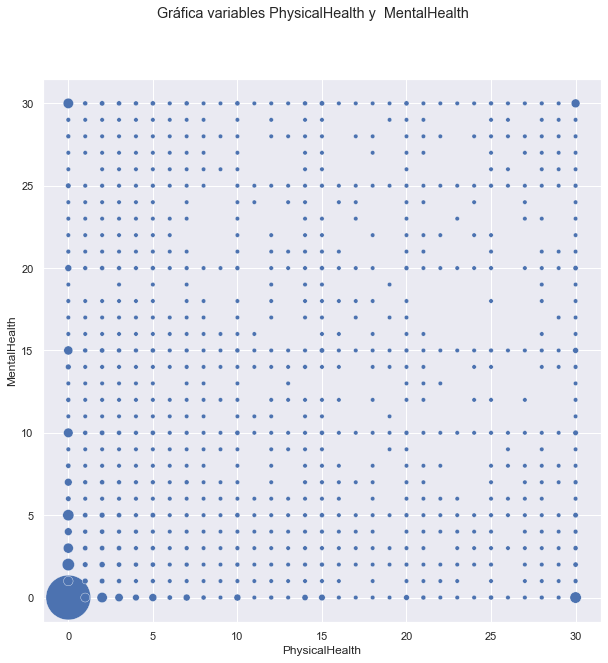

In [50]:
# Visualización de la relación entre 'PhysicalHealth' y 'MentalHealth'
# ==============================================================================

a = df.groupby(['PhysicalHealth', 'MentalHealth'])['N'].sum().reset_index()

fig, (ax1) = plt.subplots(1, 1, figsize = (10,10))
fig.suptitle('Gráfica variables PhysicalHealth y  MentalHealth')

sns.scatterplot(data=a, x='PhysicalHealth', y='MentalHealth', size='N', legend=False, sizes=(20, 2000))

##### d.2.2 Variables PhysicalHealth (númerica) y DiffWalking (Categoríca Bivariada)

***
Al igual que en el caso anterior se aprecia que la información concentrada en los valores 0 contemplan muchos de los datos, de acá se puede presumir el indicador de correlación que sobresale a los demas pares de datos.

***

<AxesSubplot:xlabel='PhysicalHealth_YN', ylabel='Density'>

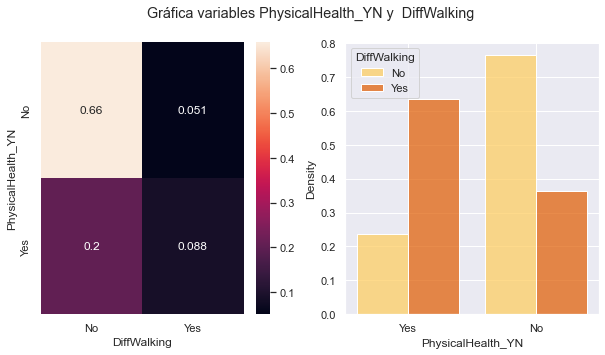

In [51]:
# Visualización de la relación entre 'PhysicalHealth' y 'DiffWalking'
# ==============================================================================

a = df.groupby(['PhysicalHealth_YN', 'DiffWalking'])['N'].sum().reset_index()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,5))
fig.suptitle('Gráfica variables PhysicalHealth_YN y  DiffWalking')

sns.heatmap(pd.crosstab(a['PhysicalHealth_YN'], a['DiffWalking'], values=a['N'], aggfunc=np.sum, normalize = True), annot = True, ax = ax1)
sns.histplot(hue = df['DiffWalking'], x = df['PhysicalHealth_YN'], bins = 10, stat = 'density', common_norm=False, shrink = 0.8, multiple = 'dodge', palette='YlOrBr', ax = ax2)


##### d.2.3 Variables PhysicalActivity (Categoríca Bivariada) y DiffWalking (Categoríca Bivariada)

***
En este caso se aprecia que en general existe una correlación negativa (baja) pero que podría estar relacionada con la información de que la gente que hace actividad fisica no tiene problemas para desplazarse
***

<AxesSubplot:xlabel='PhysicalActivity', ylabel='Density'>

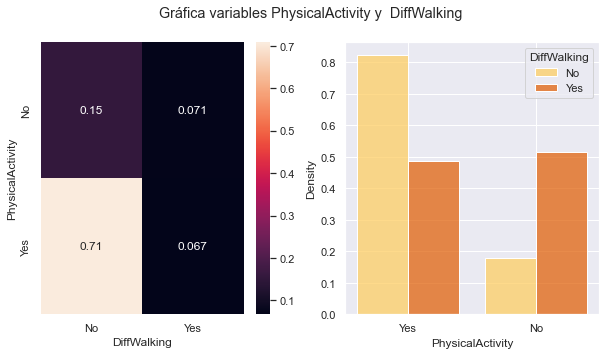

In [52]:
# Visualización de la relación entre 'PhysicalActivity' y 'DiffWalking'
# ==============================================================================

a = df.groupby(['PhysicalActivity', 'DiffWalking'])['N'].sum().reset_index()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,5))
fig.suptitle('Gráfica variables PhysicalActivity y  DiffWalking')

sns.heatmap(pd.crosstab(a['PhysicalActivity'], a['DiffWalking'], values=a['N'], aggfunc=np.sum, normalize = True), annot = True, ax = ax1)
sns.histplot(hue = df['DiffWalking'], x = df['PhysicalActivity'], bins = 10, stat = 'density', common_norm=False, shrink = 0.8, multiple = 'dodge', palette='YlOrBr', ax = ax2)


### e. Estadísticas Básicos Multivariados entre variables

***
Al revisar la información de correlaciones anterior se aprecia que varias variables tienen una correlación baja con la variable objetivo. Se procede a realizar un análisis multivariado para así, visualmente, identificar si existen algunas relaciones más complejas.
***

***
Se aprecia que en general no existen mayores diferencias (o al menos significativas) que nos de luces de relación de variables con HeartDisease. Ahora bien, a lo largo de algunas variables se aprecia que en la medida que los valores de las variables tienden a ser mayores se ve una mayor presencia de casos con valor HeartDisease = 'Yes'. Algo que hace sentigo al pensar que en la medida que se dan situaciones de malos hábitos de salud se puede dar un mayor nivel de propensión a una enfermedad al corazón.
***

<AxesSubplot:title={'center':'Distribución de AgeCategory y BMI por marca Heart Disease'}, ylabel='BMI'>

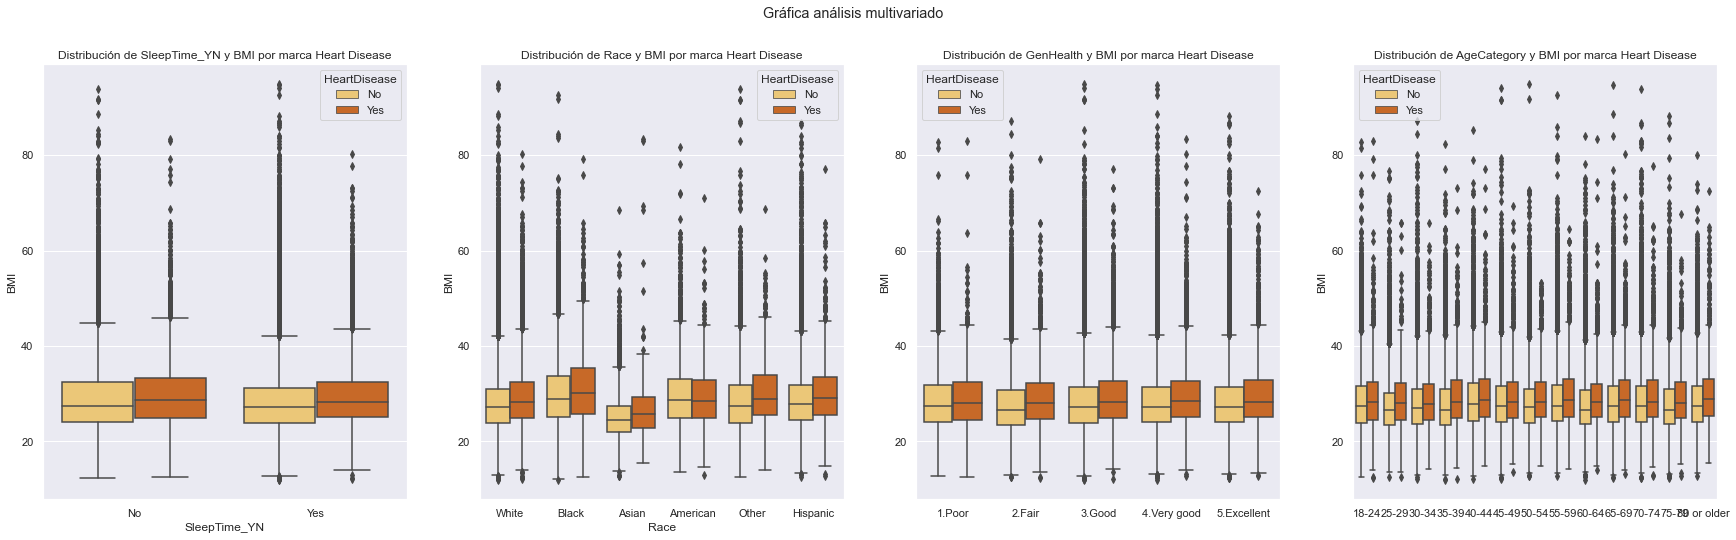

In [53]:
# Visualización de la relación de varias variables (Categóricas y Continuas)
# ==============================================================================

fig, ax = plt.subplots(1, 4, figsize=(30,8))
fig.suptitle('Gráfica análisis multivariado')

ax[0].set_title(f'Distribución de SleepTime_YN y BMI por marca Heart Disease')
sns.boxplot(ax=ax[0], data = df, x = 'SleepTime_YN', y = 'BMI', hue = 'HeartDisease', palette='YlOrBr')

ax[1].set_title(f'Distribución de Race y BMI por marca Heart Disease')
sns.boxplot(ax=ax[1], data = df, x = 'Race', y = 'BMI', hue = 'HeartDisease', palette='YlOrBr')

ax[2].set_title(f'Distribución de GenHealth y BMI por marca Heart Disease')
sns.boxplot(ax=ax[2], data = df, x =np.sort(df['GenHealth']), y = 'BMI', hue = 'HeartDisease', palette='YlOrBr')

ax[3].set_title(f'Distribución de AgeCategory y BMI por marca Heart Disease')
sns.boxplot(ax=ax[3], data = df, x =np.sort(df['AgeCategory']), y = 'BMI', hue = 'HeartDisease', palette='YlOrBr')


***
El análisis realizado contempla la mayor parte de variables númericas y númericas ordinales para tener una gráfica general de varias variables y ver cómo se relacionan con HeartDisease. En general no se aprecia una relación clara por parte de las diferentes variables que permitan a primera vista identificar relaciones subyacentes en los datos para predecir la variable buscada. Sin embargo, se realizará a futuro un análisis de categorías con un algoritmo de clasificación para determinar si existen reglas entre las variables conjuntas que permitan encontrar reglas más complejas de predicción. 

El análisis en cuestión nos entrega algunas relaciones interesantes que habíamos apreciado anteriormente, como por ejemplo la concentración de algunas variables para los casos con problemas al corazón cuando se presentan extremos en las variables.
***

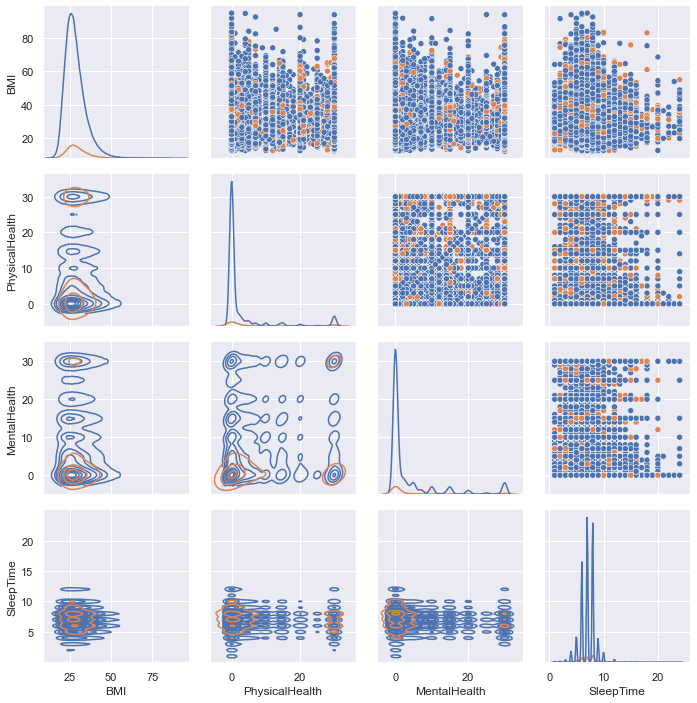

In [54]:
# Visualización de la relación de varias variables (Continuas)
# ==============================================================================

df_Multivariado = df[['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime', 'HeartDisease']]
g = sns.PairGrid(df_Multivariado, diag_sharey=False, hue='HeartDisease')
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot)

## Resumen de lo trabajado ##

***
_En función de los análisis presentados se puede apreciar lo siguiente:_

*   _No existe (como era de esperar) una variable que tenga una correlación fuerte con la variable objetivo. Se evaluarán modelos de predicción que busquen relaciones conjuntas de variables para mejorar esta relación._
*   _La baja existencia de variables continuas genera una evaluación del proyecto de una forma distinta, puesto que la evaluación por visualización se limita bastante. Sin embargo, la evaluación númerica (correlaciones) da una buena mirada referente de los vinculos que podrían existir en las variables._
*   _Existen valores outliers, cerca del 3% en cada columa, se decidió no eliminar los registros para no perder representatividad, para esto se trabajaron con algunas variables nuevas que permitan categorizar y comparar con la variable objetivo._

***

## Objetivo para los datos ##

***
_En función del análisis realizado se definen los siguientes objetivos a trabajar con los datos:_

*  _Implementar un ajuste de los datos dado el desbalance de clases que existe en la variable objetivo para trabajar modelos de predicción._
*  _Implementar un modelo de regresión logísitica para determinar el nivel de predicción que tenemos con la variable HeartDisease._
*  _Seguir realizando ingeniería de características para determinar si existen relaciones implícitas en este dataset._
*   _Implementar un ejercicio de sensibilización eliminando los casos outliers para así ver el efecto que tienen en la predicción._
*   _Implementar modelos de árboles de decisión para así determinar si mejora el nivel de precisión de predicción._

***

## Modelo de Clasificación ##

***
Aplicaremos un modelo de clasificación para evaluar la posibilidad de predecir alguna enfermedad cardíaca. Cabe recordar que hemos creado algunas variables nuevas para ver si aportan dentro de la estimación buscada. Esto nos da un dataset de 319,795 registros y 23 columnas.
***

In [55]:
# Dimensiones del dataset
######################################################################
df.shape

(319795, 23)

### Escalamiento de datos ###

In [56]:
# Definición de naturaleza de las variables
# ==============================================================================
Binarias = ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'Diabetic', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer',  'PhysicalHealth_YN', 'MentalHealth_YN', 'SleepTime_YN']
Continua = ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']
Categorica = ['AgeCategory', 'Race', 'GenHealth', 'BMI_Rg']

In [57]:
le = LabelEncoder()

for i in Categorica:
    df[i] = le.fit_transform(df[i])

for i in Binarias:
    df[i] = le.fit_transform(df[i])


In [58]:
sc = StandardScaler()

for i in Continua:
    df[[i]] = sc.fit_transform(df[[i]])

### Definición de variable independiente y dependientes ###

In [59]:
# Definición de variables dependientes e independientes
######################################################################
X = df.copy()                # variables dependientes
y = X.pop('HeartDisease')    # variable independiente

### Balanceo de muestras

In [60]:
ros = RandomOverSampler(random_state=42)
X, y = ros.fit_resample(X, y)

### Separación del conjunto de datos ###

In [61]:
# Definición de conjunto de entrenamiento y testeo
######################################################################
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [62]:
print('\n')
print('Dimensiones dataset dependientes - Entrenamiento: {}'.format(X_train.shape))
print('Dimensiones dataset independiente - Test: {}'.format(y_train.shape))
print('\n')
print('Dimensiones dataset dependientes - Test: {}'.format(X_test.shape))
print('Dimensiones dataset independiente - Test: {}'.format(y_test.shape))
print('\n')



Dimensiones dataset dependientes - Entrenamiento: (467875, 22)
Dimensiones dataset independiente - Test: (467875,)


Dimensiones dataset dependientes - Test: (116969, 22)
Dimensiones dataset independiente - Test: (116969,)




### Modelos de Predicción ###

### a. Regresión Logística

##### a.1. Ajuste del modelo

In [63]:
# Modelo: Regresión Logística
####################################################################################################

rl = LogisticRegression()                     # Definición del modelo de regresión Logística
rl.fit(X_train,y_train)                       # Ajuste de modelo para conjuntos de entrenamiento

y_train_pred = rl.predict(X_train)            # Estimación de la variable objetivo según modelo ajustado para datos de entrenamiento
y_test_pred = rl.predict(X_test)              # Estimación de la variable objetivo según modelo ajustado para datos de testeo


##### a.2. Métricas de Evaluación

In [64]:
# Matriz de Confusión
###################################################################################################
confusion_matrix(y_test,y_test_pred)

array([[43649, 14753],
       [12915, 45652]])

In [65]:
# Matriz de Confusión y métricas de ajuste
###################################################################################################
vp, fp, fn, vn = confusion_matrix(y_test,y_test_pred).ravel()

print('Metricas de ajuste')
print('---------------------------')
print('Accuracy: ', (vp + vn)/(vp + fp + fn + vn))
print('\n')
print('Precisión[0]: ', (vp)/(vp + fp))
print('Recall[0] (Sensibilidad): ', (vp)/(vp + fn))
print('\n')
print('Precisión[1]: ', (vn)/(vn + fn))
print('Recall[1] (Especificidad): ', (vn)/(vn + fp))

Metricas de ajuste
---------------------------
Accuracy:  0.7634586941839291


Precisión[0]:  0.7473887880552036
Recall[0] (Sensibilidad):  0.7716745633264974


Precisión[1]:  0.779483326788123
Recall[1] (Especificidad):  0.7557652512209254


##### a.3. Importancia de las variables

In [66]:
coeficientes_rl = pd.DataFrame(columns = ['Variable', 'Factor'])

In [67]:
# Importancia de las variables
###################################################################################################
importancer_rl = rl.coef_[0]
columns = X.columns

for i in range(len(columns)):
    auxiliar = pd.DataFrame.from_dict({'Variable': [columns[i]], 'Factor': [importancer_rl[i]]})
    coeficientes_rl = pd.concat([coeficientes_rl, auxiliar], ignore_index = True)

coeficientes_rl.sort_values(by = 'Factor', ascending = False)

,Variable,Factor
3,Stroke,1.224655
7,Sex,0.740885
15,KidneyDisease,0.606393
10,Diabetic,0.495936
1,Smoking,0.385406
14,Asthma,0.3005
8,AgeCategory,0.290708
6,DiffWalking,0.241324
18,PhysicalHealth_YN,0.178938
16,SkinCancer,0.132012


### b. Árbol de Clasificación

##### b.1. Ajuste del modelo

In [68]:
# Modelo: Árbol de Clasificación
####################################################################################################

dt = DecisionTreeClassifier(max_depth=2, random_state = 42)       # Definición del modelo de árbol de clasificación
dt.fit(X_train, y_train)                                          # Ajuste de modelo para conjuntos de entrenamiento

y_train_pred = dt.predict(X_train)                                # Estimación de la variable objetivo según modelo ajustado para datos de entrenamiento
y_test_pred = dt.predict(X_test)                                  # Estimación de la variable objetivo según modelo ajustado para datos de testeo


##### b.2. Métricas de Evaluación

In [69]:
# Matriz de Confusión
###################################################################################################
confusion_matrix(y_test,y_test_pred)

array([[42453, 15949],
       [16860, 41707]])

In [70]:
# Matriz de Confusión y métricas de ajuste
###################################################################################################
vp, fp, fn, vn = confusion_matrix(y_test,y_test_pred).ravel()

print('Metricas de ajuste')
print('---------------------------')
print('Accuracy: ', (vp + vn)/(vp + fp + fn + vn))
print('\n')
print('Precisión[0]: ', (vp)/(vp + fp))
print('Recall[0] (Sensibilidad): ', (vp)/(vp + fn))
print('\n')
print('Precisión[1]: ', (vn)/(vn + fn))
print('Recall[1] (Especificidad): ', (vn)/(vn + fp))

Metricas de ajuste
---------------------------
Accuracy:  0.7195068778907232


Precisión[0]:  0.7269100373274888
Recall[0] (Sensibilidad):  0.7157452834960295


Precisión[1]:  0.7121245752727645
Recall[1] (Especificidad):  0.7233765783266269


##### b.3. Importancia de las variables

In [71]:
coeficientes_dt = pd.DataFrame(columns = ['Variable', 'Factor'])

In [72]:
# Importancia de las variables
###################################################################################################
importancer_dt = dt.feature_importances_
columns = X.columns

for i in range(len(columns)):
    auxiliar = pd.DataFrame.from_dict({'Variable': [columns[i]], 'Factor': [importancer_dt[i]]})
    coeficientes_dt = pd.concat([coeficientes_dt, auxiliar], ignore_index = True)

coeficientes_dt.sort_values(by = 'Factor', ascending = False)

,Variable,Factor
8,AgeCategory,0.644585
12,GenHealth,0.355415
0,BMI,0.0
20,SleepTime_YN,0.0
19,MentalHealth_YN,0.0
18,PhysicalHealth_YN,0.0
17,N,0.0
16,SkinCancer,0.0
15,KidneyDisease,0.0
14,Asthma,0.0


### c. Random Forest

##### c.1. Ajuste del modelo

In [73]:
##### Modelo: Random Forest ####################################################################################################

rf = RandomForestClassifier(random_state=11, n_estimators=300, max_features="log2", max_depth = 5, min_samples_leaf = 10)       # Definición del modelo de árbol de clasificación
rf.fit(X_train, y_train)                                                                                 # Ajuste de modelo para conjuntos de entrenamiento

y_train_pred = rf.predict(X_train)                                # Estimación de la variable objetivo según modelo ajustado para datos de entrenamiento
y_test_pred = rf.predict(X_test)                                  # Estimación de la variable objetivo según modelo ajustado para datos de testeo


##### c.2. Métricas de Evaluación

In [74]:
# Matriz de Confusión
###################################################################################################
confusion_matrix(y_test,y_test_pred)

array([[42196, 16206],
       [12259, 46308]])

In [75]:
# Métricas de ajuste
###################################################################################################
vp, fp, fn, vn = confusion_matrix(y_test,y_test_pred).ravel()

print('Metricas de ajuste')
print('---------------------------')
print('Accuracy: ', (vp + vn)/(vp + fp + fn + vn))
print('\n')
print('Precisión[0]: ', (vp)/(vp + fp))
print('Recall[0] (Sensibilidad): ', (vp)/(vp + fn))
print('\n')
print('Precisión[1]: ', (vn)/(vn + fn))
print('Recall[1] (Especificidad): ', (vn)/(vn + fp))

Metricas de ajuste
---------------------------
Accuracy:  0.7566449230137899


Precisión[0]:  0.7225095030992089
Recall[0] (Sensibilidad):  0.7748783399136902


Precisión[1]:  0.7906841736814247
Recall[1] (Especificidad):  0.7407620692964776


##### b.3. Importancia de las variables

In [76]:
coeficientes_rf = pd.DataFrame(columns = ['Variable', 'Factor'])

In [77]:
# Importancia de las variables
###################################################################################################
importancer_rf = rf.feature_importances_
columns = X.columns

for i in range(len(columns)):
    auxiliar = pd.DataFrame.from_dict({'Variable': [columns[i]], 'Factor': [importancer_rf[i]]})
    coeficientes_rf = pd.concat([coeficientes_rf, auxiliar], ignore_index = True)

coeficientes_rf.sort_values(by = 'Factor', ascending = False)

,Variable,Factor
8,AgeCategory,0.351297
12,GenHealth,0.203616
6,DiffWalking,0.103453
10,Diabetic,0.076604
3,Stroke,0.070334
4,PhysicalHealth,0.053233
1,Smoking,0.031358
7,Sex,0.026776
18,PhysicalHealth_YN,0.026053
15,KidneyDisease,0.020715


## Resumen Ejecutivo

### Principales acciones realizadas

***

Dentro de los modelos de predicción utilizados considero: regresión logística, árboles de decisión y random forest. 

Los valores de 'accuracy' de los modelos son 76%, 72% y 75% respectivamente. Sin embargo, utilizo la medida de recall para estimar el poder de predicción de mis modelos, sobretodo porque el costo de equivocar una predicción (decir que una persona no tendrá una enfermedad cardíaca y sí la tiene realmente) es muy alta para mi ejercicio. En los cálculos siguientes se aprecia que el primer modelo - regresión logística - nos entrega un valor de especificidad (casos que pronostico con enfermedad cardíaca sobre el total de los casos reales con esta condición) de un 75% que no es un mal indicador para este tipo de modelamiento con clases desbalanceadas. Por otro lado, los modelos de arboles de clasificación y random forest dan un recall de 72% y 74%. En el caso del modelo random forest se tuvo que ajustar algunos parámetros para evitar el sobreajuste. 

En el modelo de regresión logística se aprecia que las variables que mayor efecto tienen en la enfermedad cardíaca son el haber presentado un accidente cardiovascular, problemas renales, ser fumador y presentar rasgos de diabetes (entre otras). Por otro lado, el modelo final que se utiliza es random forest por el nivel de recall que presenta (74%) con una optimización 'bruta' de los parametros. Además, tiene la particularidad que le da una importancia relativa a todas las variables en el dataset.

***

# Anexos

## Cross Validation

### a. K-Fold

***
Se realiza un K-Fold para determinar si existe algún sobre ajuste en los resultados del modelo seleccionado. Se aprecia en los resultados que el modelo mantiene resultados similares a lo largo de las diferentes variantes del conjunto de entrenamiento y testeo. Se infiere que no existe un sobre ajuste del modelo desarrollado.-
***



In [78]:
# Creación de una formula para obtener los parámetros del K-Fold
###############################################################################
def cross_validation(model, _X, _y, _cv=5):
    _scoring = ['accuracy', 'precision', 'recall', 'f1']
    results = cross_validate(estimator=model, X=_X, y=_y, cv=_cv, scoring=_scoring, return_train_score=True)
                             
    return {"Training Accuracy scores": results['train_accuracy'],
              "Mean Training Accuracy": results['train_accuracy'].mean()*100,
              "Training Precision scores": results['train_precision'],
              "Mean Training Precision": results['train_precision'].mean(),
              "Training Recall scores": results['train_recall'],
              "Mean Training Recall": results['train_recall'].mean(),
              "Training F1 scores": results['train_f1'],
              "Mean Training F1 Score": results['train_f1'].mean(),
              "Test Accuracy scores": results['test_accuracy'],
              "Mean Test Accuracy": results['test_accuracy'].mean()*100,
              "Test Precision scores": results['test_precision'],
              "Mean Test Precision": results['test_precision'].mean(),
              "Test Recall scores": results['test_recall'],
              "Mean Test Recall": results['test_recall'].mean(),
              "Test F1 scores": results['test_f1'],
              "Mean Test F1 Score": results['test_f1'].mean()
              }

In [79]:
# Aplicación del método de validación cruzada
###############################################################################
decision_tree_result = cross_validation(rf, X, y, 5)

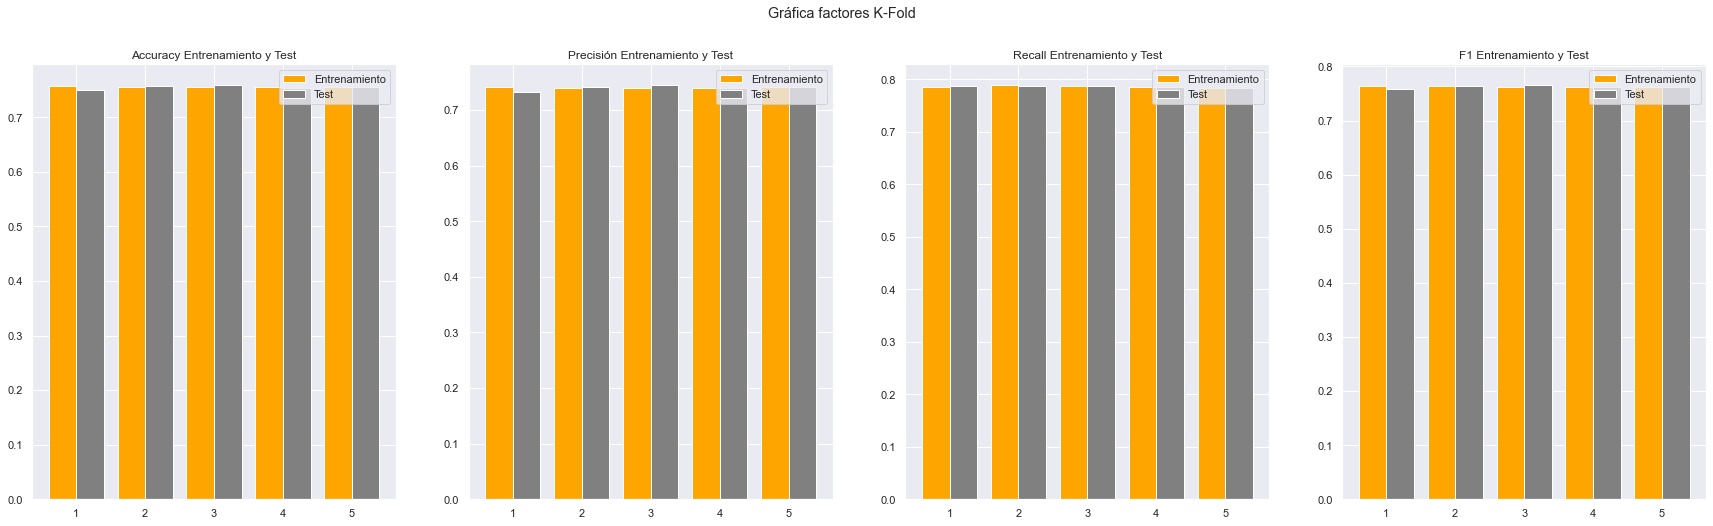

In [85]:
# Visualización de la relación de varias variables (Categóricas y Continuas)
# ==============================================================================

fig, ax = plt.subplots(1, 4, figsize=(30,8))
fig.suptitle('Gráfica factores K-Fold')

ax[0].set_title(f'Accuracy Entrenamiento y Test')
ax[0].bar(np.arange(5) + 1-0.2, decision_tree_result["Training Accuracy scores"], 0.4, color='orange', label='Entrenamiento')
ax[0].bar(np.arange(5) + 1+0.2, decision_tree_result["Test Accuracy scores"], 0.4, color='gray', label='Test')
ax[0].legend()

ax[1].set_title(f'Precisión Entrenamiento y Test')
ax[1].bar(np.arange(5) + 1-0.2, decision_tree_result["Training Precision scores"], 0.4, color='orange', label='Entrenamiento')
ax[1].bar(np.arange(5) + 1+0.2, decision_tree_result["Test Precision scores"], 0.4, color='gray', label='Test')
ax[1].legend()

ax[2].set_title(f'Recall Entrenamiento y Test')
ax[2].bar(np.arange(5) + 1-0.2, decision_tree_result["Training Recall scores"], 0.4, color='orange', label='Entrenamiento')
ax[2].bar(np.arange(5) + 1+0.2, decision_tree_result["Test Recall scores"], 0.4, color='gray', label='Test')
ax[2].legend()

ax[3].set_title(f'F1 Entrenamiento y Test')
ax[3].bar(np.arange(5) + 1-0.2, decision_tree_result["Training F1 scores"], 0.4, color='orange', label='Entrenamiento')
ax[3].bar(np.arange(5) + 1+0.2, decision_tree_result["Test F1 scores"], 0.4, color='gray', label='Test')
ax[3].legend()


## Optimizar parametros


### a. Brute Force

Se revisarán distintos escenarios para ver cuales son los parametros que entregan mejor resultado de las metricas de validación accuracy y recall, en el modelo de Random Forest, ### a. Brute Force### a. Brute Forcedefiniendo así el set de parametros como sigue: 

***

Perfil ( 300 , sqrt , 5 , 10 ):  Accuracy:  0.7551488001094308  -----  Recall[1] (Especificidad):  0.7408433463260639 (Tpo. Proc:  0:02:53.609007 )

***

In [ ]:
from datetime import datetime


# Definición de conjunto de entrenamiento y testeo
######################################################################
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

d_n_estimators = {0: 100, 1: 300, 2: 500}
d_max_features = {0: 'log2', 1: 'sqrt', 2: 'auto'}
d_max_depth = {0: 1, 1: 2, 2: 3, 3: 4, 4: 5, 5: 6, 6: 7, 7: 8}
d_min_samples_leaf = {0: 10} # se prueban otras opciones pero no da mejora {1: 10, 2: 15, 3: 20}
d_criterion = {0: 'gini', 1:'entropy'}


for i in range(len(d_n_estimators)):
    for j in range(len(d_max_features)):
        for k in range(len(d_max_depth)):
            for m in range(len(d_min_samples_leaf)):
                for f in range(len(d_criterion)):
                    ini = datetime.now()
                    ##### Modelo: Random Forest
                    ####################################################################################################

                    rf = RandomForestClassifier(random_state=11, criterion = d_criterion[f], n_estimators=d_n_estimators[i], max_features=d_max_features[j], max_depth = d_max_depth[k], min_samples_leaf = d_min_samples_leaf[m])       # Definición del modelo de árbol de clasificación
                    rf.fit(X_train, y_train)                                                                                 # Ajuste de modelo para conjuntos de entrenamiento

                    y_train_pred = rf.predict(X_train)                                # Estimación de la variable objetivo según modelo ajustado para datos de entrenamiento
                    y_test_pred = rf.predict(X_test)                                  # Estimación de la variable objetivo según modelo ajustado para datos de testeo

                    # Matriz de Confusión
                    ###################################################################################################
                    confusion_matrix(y_test,y_test_pred)

                    # Métricas de ajuste
                    ###################################################################################################
                    vp, fp, fn, vn = confusion_matrix(y_test,y_test_pred).ravel()
 
                    fin = datetime.now()

                    print('Perfil', '(', d_n_estimators[i], ',', d_max_features[j], ',', d_max_depth[k], ',', d_min_samples_leaf[m], ',', d_criterion[f] , '): ', 'Accuracy: ', (vp + vn)/(vp + fp + fn + vn), ' ----- ', 'Recall[1] (Especificidad): ', (vn)/(vn + fp), '(Tpo. Proc: ', fin - ini, ')')


Perfil ( 100 , log2 , 1 , 10 , gini ):  Accuracy:  0.7291846557634929  -----  Recall[1] (Especificidad):  0.7318572971466397 (Tpo. Proc:  0:00:17.730094 )
Perfil ( 100 , log2 , 1 , 10 , entropy ):  Accuracy:  0.7307235250365481  -----  Recall[1] (Especificidad):  0.7356002531823617 (Tpo. Proc:  0:00:17.208124 )
Perfil ( 100 , log2 , 2 , 10 , gini ):  Accuracy:  0.741888876539938  -----  Recall[1] (Especificidad):  0.7331287325812873 (Tpo. Proc:  0:00:26.264856 )
Perfil ( 100 , log2 , 2 , 10 , entropy ):  Accuracy:  0.7404440492780139  -----  Recall[1] (Especificidad):  0.7278599742263837 (Tpo. Proc:  0:00:27.011092 )
Perfil ( 100 , log2 , 3 , 10 , gini ):  Accuracy:  0.7455907120690097  -----  Recall[1] (Especificidad):  0.7364104773107573 (Tpo. Proc:  0:00:37.954606 )
Perfil ( 100 , log2 , 3 , 10 , entropy ):  Accuracy:  0.7455223178790962  -----  Recall[1] (Especificidad):  0.73384148840259 (Tpo. Proc:  0:00:36.815415 )
Perfil ( 100 , log2 , 4 , 10 , gini ):  Accuracy:  0.75190007608

### b. GridSearchCV

En desarrollo

***

***

In [ ]:
# GridSearchCV
##############################################################################
rfc=RandomForestClassifier(random_state=42)

param_grid = { 
    'n_estimators': [300,400,500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [3,5,7,9],
    'criterion' :['gini', 'entropy']
}

model = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)

In [ ]:
model.fit(X_train, y_train)

In [ ]:
print("Mejores parametros: "+str(model.best_params_))
print("Mejor Score: "+str(model.best_score_)+'\n')

In [ ]:
rfc1=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 200, max_depth=8, criterion='gini')
rfc1.fit(X_train, y_train)
pred=rfc1.predict(X_test)
print("Accuracy for Random Forest on CV data: ",accuracy_score(y_test,pred))